In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from pathlib import PurePath
import cv2 #opencv-python

#
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

ROOT_DIR = os.path.join(os.getcwd(), "poker")
DATA_PATH = os.path.join(ROOT_DIR, "data")
ORIGIN_IMG_PATH = os.path.join(DATA_PATH, "origin_imgs")

TRAIN_IMG_PATH = os.path.join(DATA_PATH, "train")

# Img's size and lovel
IMG_HEIGHT = 28
IMG_WIDTH = 28
IMG_CHANNEL = 1

Using TensorFlow backend.
/Users/r3dmaohong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [9]:
all_img_paths = glob.glob(os.path.join(ORIGIN_IMG_PATH, "*.PNG"))

In [15]:
print(PurePath(all_img_paths[0]))
print("===")
print(PurePath(all_img_paths[0]).stem)

/Users/r3dmaohong/workspace/dataScience/python/deep-learning/keras/data/origin_imgs/c01.PNG
===
c01


In [16]:
for img_path in all_img_paths:
    # base name
    filename = (PurePath(img_path).stem)
    new_filename = filename + ".png"
    card_img_grey = cv2.imread(img_path, 0)
    card_img = cv2.resize(card_img_grey, (IMG_HEIGHT, IMG_WIDTH)) 
    cv2.imwrite(os.path.join(TRAIN_IMG_PATH, new_filename), card_img)

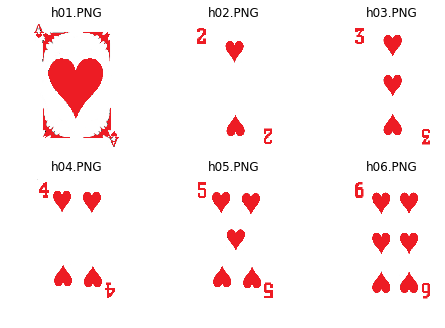

In [19]:
plt.figure(figsize=(8,8))

for i in range(0, 6):
    img_file = 'h0'+str(i+1)+'.PNG'
    img = cv2.imread(os.path.join(ORIGIN_IMG_PATH, img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(330+1+i) # (331) -> first sub img, (332) -> second sub img
    plt.title(img_file)
    plt.axis('off')
    plt.imshow(img)

plt.show()

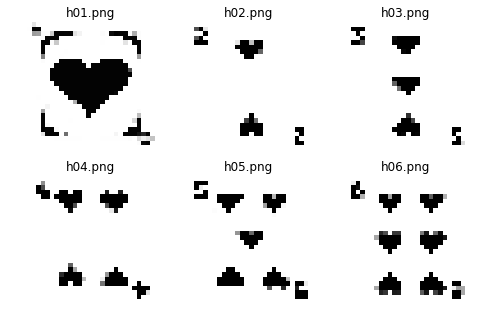

In [25]:
plt.figure(figsize=(8,8))

for i in range(0, 6):
    img_file = 'h0'+str(i+1)+'.png'
    img = cv2.imread(os.path.join(TRAIN_IMG_PATH, img_file), 0)
    
    plt.subplot(330+1+i)
    plt.title(img_file)
    plt.axis('off')
    plt.imshow(img, cmap=plt.get_cmap('gray'))

plt.show()

In [28]:
pd.read_excel(os.path.join(DATA_PATH, 'cards_data.xlsx')).head(15)

,image_id,image_path,card_type,card_num,card_color,card_label
0,c01,c01.png,club,1,black,club1
1,c02,c02.png,club,2,black,club2
2,c03,c03.png,club,3,black,club3
3,c04,c04.png,club,4,black,club4
4,c05,c05.png,club,5,black,club5
5,c06,c06.png,club,6,black,club6
6,c07,c07.png,club,7,black,club7
7,c08,c08.png,club,8,black,club8
8,c09,c09.png,club,9,black,club9
9,c10,c10.png,club,10,black,club10


In [30]:
num_classes = 52 # poker has 52 types of cards
img_rows, img_cols, img_channels = IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL
input_shape = (img_rows, img_cols, img_channels)

# label data
cards_data = pd.read_excel(os.path.join(DATA_PATH, 'cards_data.xlsx'))
cards_label = cards_data['card_label']

In [33]:
# dict for cards' label
idx_to_label = {k:v for k, v in cards_label.iteritems()}
label_to_idx = {v:k for k, v in cards_label.iteritems()}

y = np.array(cards_label.index.values)
y_train = to_categorical(y, num_classes)
y_test = y_train.copy()

In [41]:
y_train

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [34]:
# read all the imgs
imgs = []
all_img_paths = glob.glob(os.path.join(TRAIN_IMG_PATH, "*.png"))

for img_path in all_img_paths:
    img = cv2.imread(img_path,0)
    img = img.astype('float32')/255. #normalization
    imgs.append(img)

X = np.array(imgs)    
X

array([[[ 1.        ,  0.99607843,  0.13725491, ...,  1.        ,
          1.        ,  1.        ],
        [ 1.        ,  0.86666667,  0.11764706, ...,  1.        ,
          1.        ,  0.99607843],
        [ 1.        ,  0.98431373,  0.10588235, ...,  1.        ,
          1.        ,  0.99607843],
        ..., 
        [ 1.        ,  1.        ,  1.        , ...,  0.05098039,
          0.4509804 ,  0.99215686],
        [ 1.        ,  1.        ,  1.        , ...,  0.78823531,
          0.80392158,  0.99215686],
        [ 1.        ,  1.        ,  1.        , ...,  0.4627451 ,
          0.98823529,  0.99215686]],

       [[ 1.        ,  1.        ,  1.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 1.        ,  1.        ,  0.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        , ...,  1.        ,
          1.        ,  1.        ],
        ..., 
        [ 1.        ,  1.        ,  1.        , ...,

In [35]:
X_train = X.reshape(X.shape[0], 28, 28, 1)
X_test = X_train.copy()

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (52, 28, 28, 1)
y_train: (52, 52)


In [ ]:
# keras sequential model

In [62]:
# 6 layers of Feedforward Neural Network?
def cnn_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))    
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2
                                     )))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2)) # prevent overfitting
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2)) # prevent overfitting
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model;   

model = cnn_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
__________

In [63]:
lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [64]:
#Data Augmentation
datagen_train = ImageDataGenerator(rotation_range=3.)
datagen_train.fit(X_train)

In [65]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

batch_size = 100
steps_per_epoch = 100#5000
training_epochs = 30#500

earlystopper = EarlyStopping(patience=7, verbose=1)
checkpointer = ModelCheckpoint('poker-cards.h5', verbose=1, save_best_only=True)

history = model.fit_generator(datagen_train.flow(X_train, y_train, batch_size=batch_size),
                             steps_per_epoch= steps_per_epoch,
                             epochs=training_epochs,
                             callbacks=[earlystopper, checkpointer])

Epoch 1/30
100/100 [==============================] - 39s 394ms/step - loss: 3.9382 - acc: 0.0225


/Users/r3dmaohong/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:494: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/Users/r3dmaohong/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:403: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 2/30
100/100 [==============================] - 36s 357ms/step - loss: 3.5146 - acc: 0.0677
Epoch 3/30
100/100 [==============================] - 37s 367ms/step - loss: 1.5872 - acc: 0.5021
Epoch 4/30
100/100 [==============================] - 37s 371ms/step - loss: 0.2420 - acc: 0.9121
Epoch 5/30
100/100 [==============================] - 40s 403ms/step - loss: 0.0847 - acc: 0.9721
Epoch 6/30
100/100 [==============================] - 35s 352ms/step - loss: 0.0594 - acc: 0.9827
Epoch 7/30
100/100 [==============================] - 43s 426ms/step - loss: 0.0344 - acc: 0.9900
Epoch 8/30
100/100 [==============================] - 37s 373ms/step - loss: 0.0179 - acc: 0.9940
Epoch 9/30
100/100 [==============================] - 37s 368ms/step - loss: 0.0220 - acc: 0.9933
Epoch 10/30
100/100 [==============================] - 38s 378ms/step - loss: 0.0302 - acc: 0.9927
Epoch 11/30
100/100 [==============================] - 45s 451ms/step - loss: 0.0144 - acc: 0.9960
Epoch 12/30
100/10

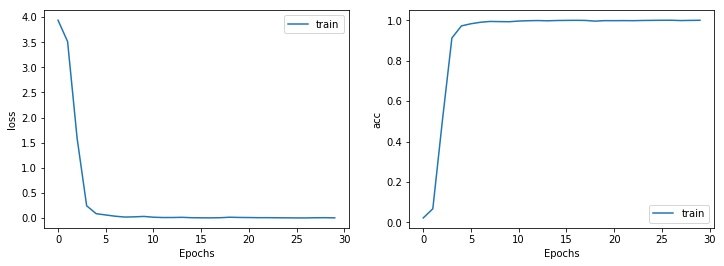

In [67]:
import matplotlib.pyplot as plt

def plot_train_history(history, train_metrics):
    plt.plot(history.history.get(train_metrics))
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train'])
    
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss')

plt.subplot(1,2,2)
plot_train_history(history, 'acc')

plt.show()

In [68]:
score = model.evaluate(X_train, y_train, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

52/52 [==============================] - 0s 5ms/step
Test loss: 0.000110486170832
Test accuracy: 1.0


In [69]:
# reorder 
randomize = np.arange(len(X_test))
np.random.shuffle(randomize)
X_test_randomize = X_test[randomize]
y_test_randomize = y_test[randomize]

In [70]:
score = model.evaluate(X_test_randomize, y_test_randomize, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

52/52 [==============================] - 0s 2ms/step
Test loss: 0.000110486162647
Test accuracy: 1.0


In [71]:
print("\t[Info] Making prediction of X_test_randomize")  
prediction = model.predict_classes(X_test_randomize)

print()
print("\t[Info] Show 52 prediction result (From 0):")
print("%s\n" % (prediction[:52]))

	[Info] Making prediction of X_test_randomize

	[Info] Show 52 prediction result (From 0):
[45 26 30  1 29 14 19  3 32 42 31 17 23 15 16 50  0 43  2 41 38 46 47 18 39
 35  4 22 21 33 27 44 10 48  8 28 11 49 37 36  9 51  7 12 34  6 20 13 40  5
 25 24]



In [78]:
y_test_randomize[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

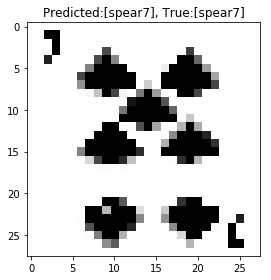

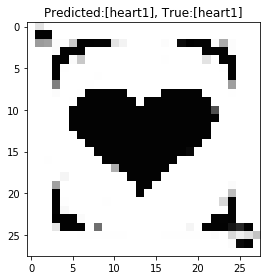

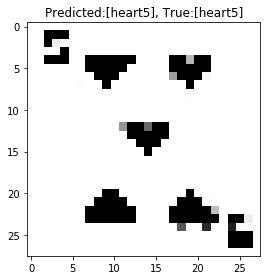

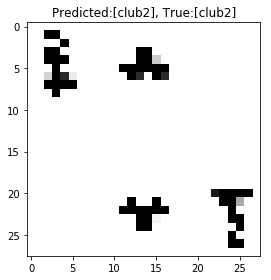

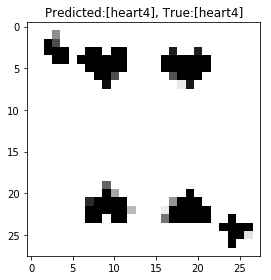

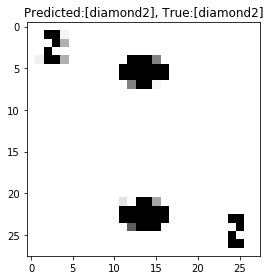

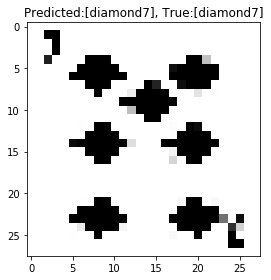

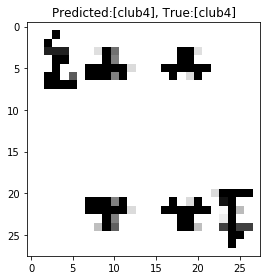

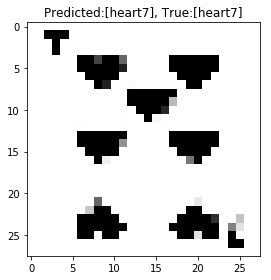

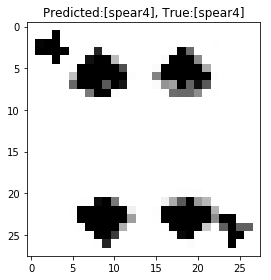

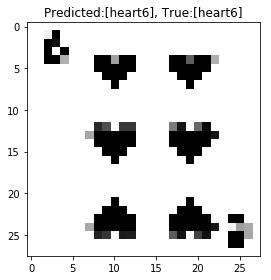

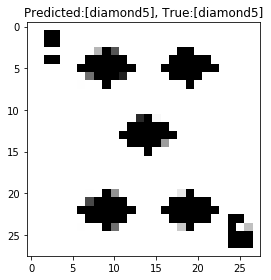

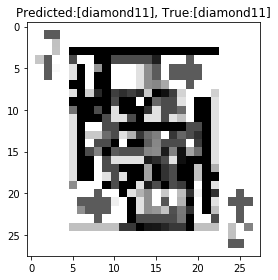

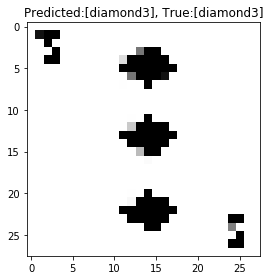

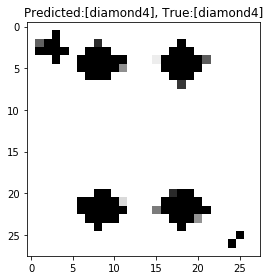

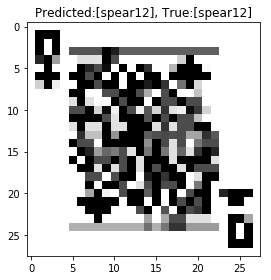

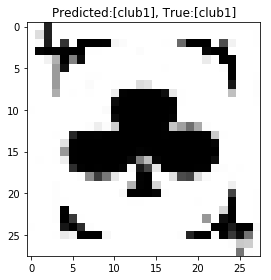

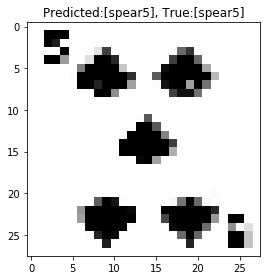

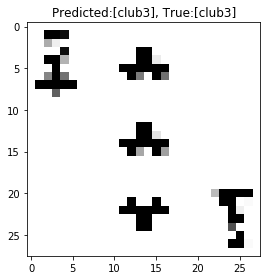

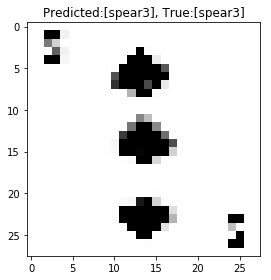

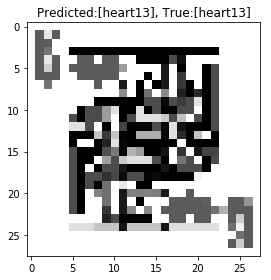

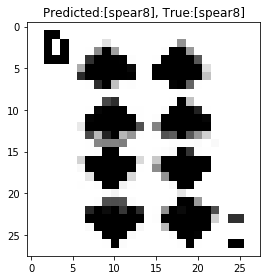

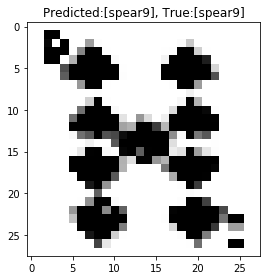

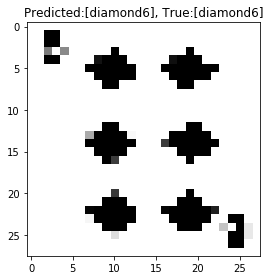

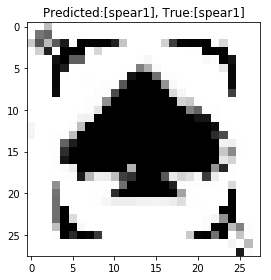

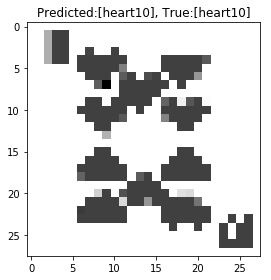

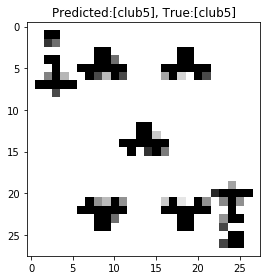

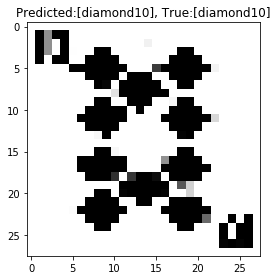

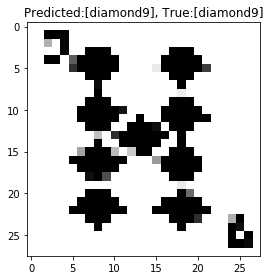

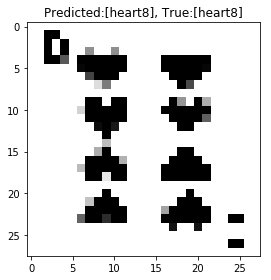

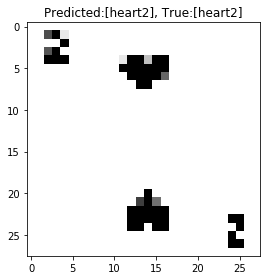

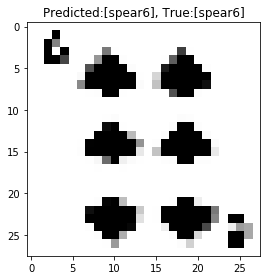

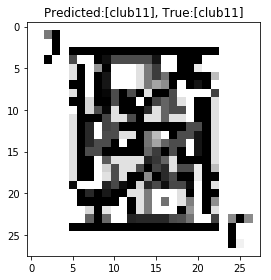

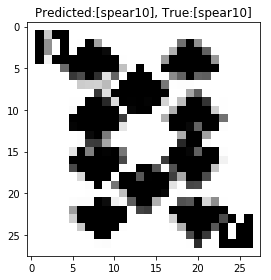

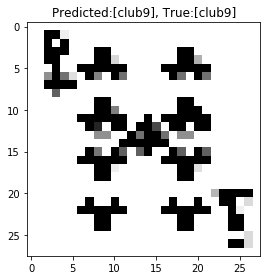

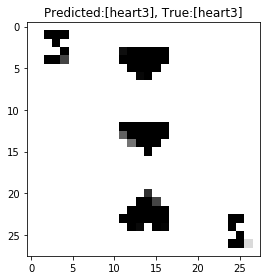

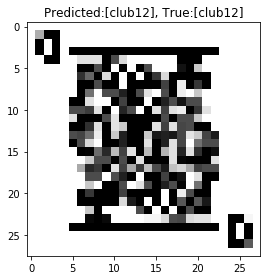

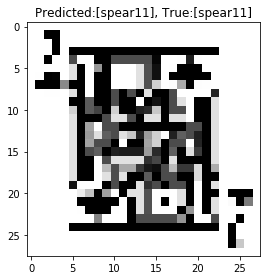

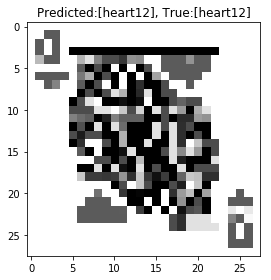

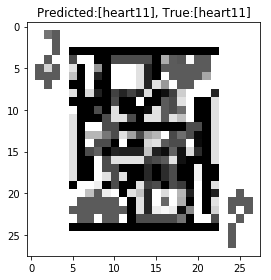

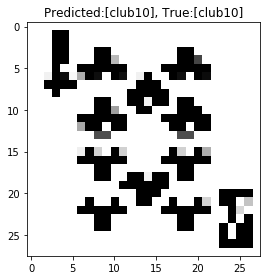

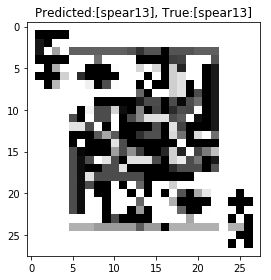

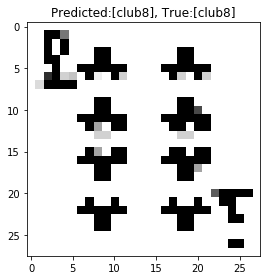

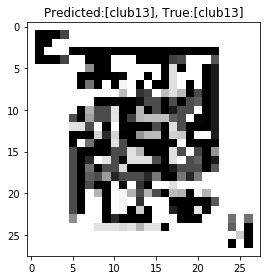

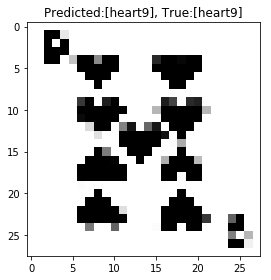

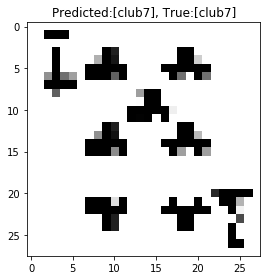

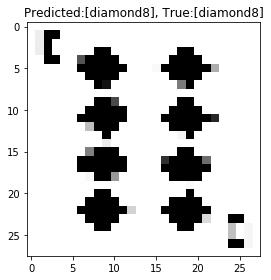

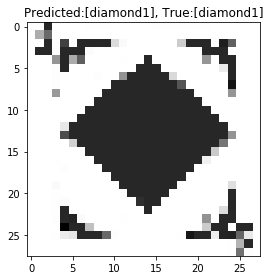

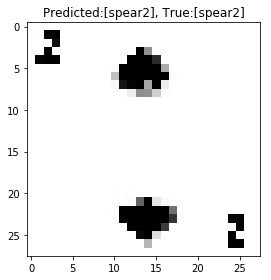

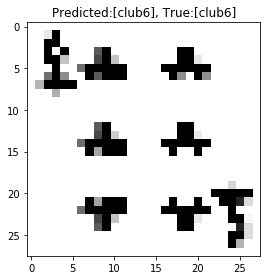

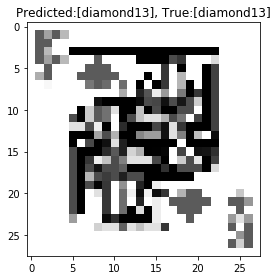

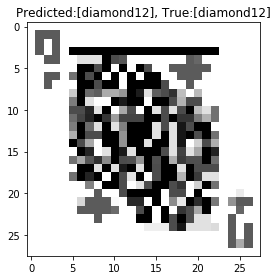

In [72]:
# print out all the predicted result
for i in range(X_test_randomize.shape[0]):
    true_class = idx_to_label.get(np.argmax(y_test_randomize[i]))
    predict_class = idx_to_label.get(prediction[i])
    plt.title("Predicted:[{}], True:[{}]".format(predict_class, true_class))
    plt.imshow(X_test_randomize[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.tight_layout()  
    plt.show()

In [80]:
#true_class = idx_to_label.get(np.argmax(y_test_randomize))
predict_class = idx_to_label.get(prediction)
    

TypeError: unhashable type: 'numpy.ndarray'

In [94]:
get_result = lambda x : idx_to_label.get(np.argmax(y_test_randomize[x]))
get_result = np.vectorize(get_result)

In [112]:
#[idx_to_label.get(ele) for ele in prediction]
list(get_result(range(X_test_randomize.shape[0])))==list(map(lambda ele: idx_to_label.get(ele), prediction))

True